<a href="https://colab.research.google.com/github/lukemoynihan15/HandGestureRecognitino/blob/main/imageClassifierXXSignLanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## https://data-flair.training/blogs/sign-language-recognition-python-ml-opencv/

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
!python --version

Python 3.7.12


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
import scipy.io as sio
GOOGLE_COLAB = True

In [3]:
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/', force_remount=True)
    path = '/content/drive/My Drive/Colab Notebooks/'
    
base_dir = path+'Capstone'

Mounted at /content/drive/


In [4]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os

# Define the random seeds

import tensorflow  as tf
tf.random.set_seed(101)

In [5]:
train_dir = base_dir+"/train"

In [6]:


train_dir_content = os.listdir(train_dir)

print("Number of classes : ", len(train_dir_content))

print("Classes: ", train_dir_content)

values, counts = np.unique(train_dir_content, return_counts=True)

Number of classes :  4
Classes:  ['fists', 'down', 'up', 'palm']


In [7]:
test_dir = base_dir+"/test"

test_dir_content =  os.listdir(test_dir)

print("Number of classes : ", len(test_dir_content))

print("Classes: ", test_dir_content)

values, counts = np.unique(test_dir_content, return_counts=True)

Number of classes :  4
Classes:  ['palm', 'fists', 'down', 'up']


In [8]:
for i in range(4):
    print('Number of samples in class named: ',train_dir_content[i],':',len(os.listdir(train_dir+'/'+ train_dir_content[i])))

Number of samples in class named:  fists : 65
Number of samples in class named:  down : 51
Number of samples in class named:  up : 44
Number of samples in class named:  palm : 46


In [9]:
from keras.preprocessing.image import ImageDataGenerator

#train_dir = to_categorical(train_dir)
#test_dir = to_categorical(test_dir)
#train_dir /= 255
#test_dir /= 255
# Create data generator for training set
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255)

# Create data generator for test set. 
test_datagen = ImageDataGenerator(rescale=1./255)

# Create an iterator for training set. 
# We want to use the data generator to read in 16 images at a time (batch_size = 16).
# Don't change the original size of the images.
train_iter = train_datagen.flow_from_directory(
        train_dir,
        seed=101,
        target_size=(100,100),
        batch_size=16)



# Create an iterator for test set. 
# We want to use the data generator to read in 16 images at a time (batch_size = 16).
# Don't change the original size of the images.

test_iter = test_datagen.flow_from_directory(
        test_dir,
        seed=101,
        class_mode=None,
        target_size=(100,100),
        batch_size=16,
        shuffle=False
    )





Found 204 images belonging to 4 classes.
Found 88 images belonging to 4 classes.


In [10]:
# confirm the iterator works
batchX, batchy = train_iter.next()



print('Batch shape of X=%s, X min=%.3f, X max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

print('Batch shape of y=%s, y min=%.3f, y max=%.3f' % (batchy.shape, batchy.min(), batchy.max()))

Batch shape of X=(16, 100, 100, 3), X min=0.001, X max=0.934
Batch shape of y=(16, 4), y min=0.000, y max=1.000


In [11]:
label_dict = train_iter.class_indices


label_dict

{'down': 0, 'fists': 1, 'palm': 2, 'up': 3}

In [12]:
def findKeyFromValue(dict, val):
  '''
  Arguments: 
  1) dict: a dictionary <key: value>
           with fruit names as the key and numerical labels as the value
  2) val: a numerical label to be converted to 'descriptive'
  Return: 
  The key out of the <key: value> pair. 
  '''
  for key, value in dict.items():
    if val == value:
      return key



In [13]:
print(findKeyFromValue(label_dict, 3))

up


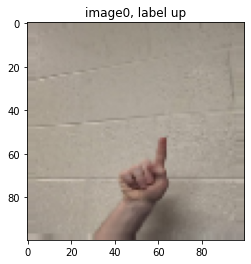

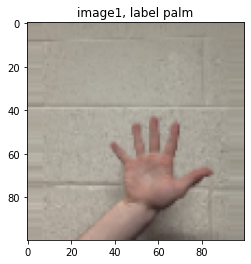

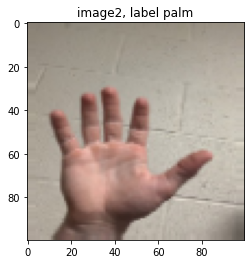

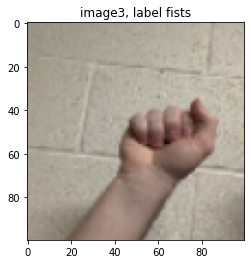

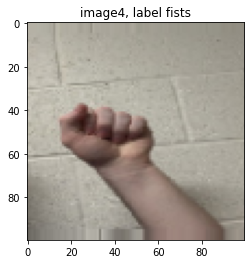

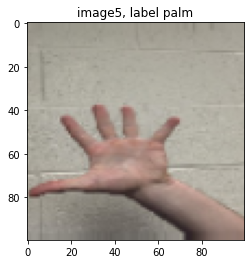

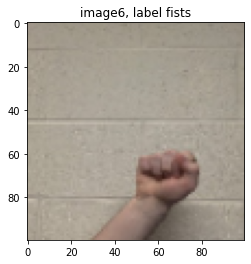

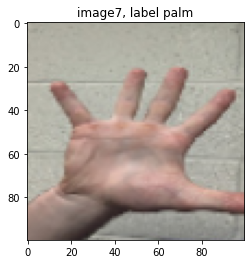

In [14]:
for i in range (8):
    
    plt.title("image"+str(i)+", label "+ findKeyFromValue(label_dict,batchy[i].argmax()))
    plt.imshow(batchX[i])
    plt.show()


In [15]:
#cnn

In [16]:
import cv2

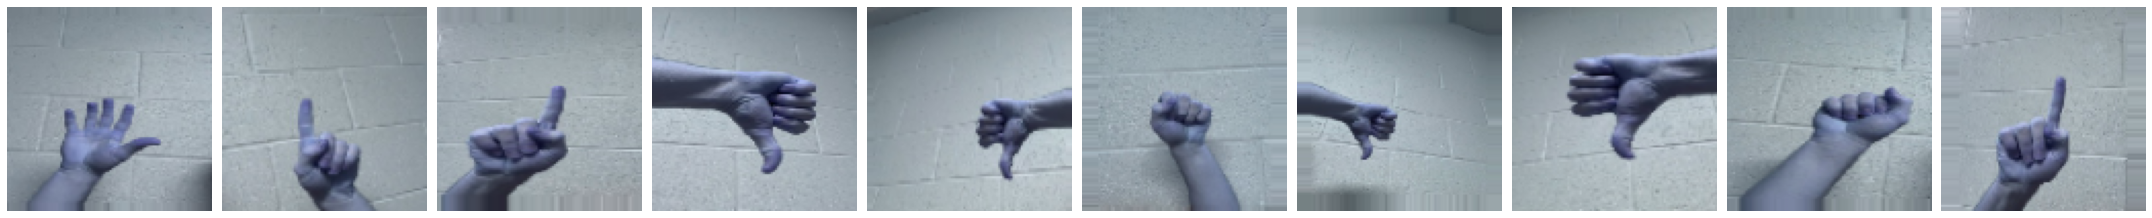

(16, 100, 100, 3)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [17]:
imgs, labels = next(train_iter) 
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(imgs.shape)
print(labels)

In [18]:
# Dimensions of our images.
img_width, img_height = 100, 100  
input_shape = (img_width, img_height, 3)

# Epochs
epochs = 5

# Number of images to read every iteration 
batch_size = 16

# Total number of images for training and testing
train_num = 204
test_num = 88

# Total number of steps in each epoch
train_steps = train_num // batch_size # integer division
test_steps  = test_num  // batch_size 

# Total number of classes
num_classes = 4


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [20]:
model = Sequential()

model.add(Conv2D(filters=15, kernel_size=(3,3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 15)        420       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 15)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 36015)             0         
                                                                 
 dense (Dense)               (None, 256)               9220096   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                        

In [21]:
# defining optimizer
from tensorflow.keras.optimizers import Adam # - Works
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

# compile the model
model.compile(optimizer=optimizer,loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
history = model.fit_generator(train_iter,
                              steps_per_epoch=train_steps,
                              epochs=epochs,
                              validation_data=test_iter,
                              validation_steps=test_steps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
12/12 [==============================] - 136s 11s/step - loss: 7.7288 - accuracy: 0.1968 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
12/12 [==============================] - 2s 171ms/step - loss: 2.6029 - accuracy: 0.2660 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
12/12 [==============================] - 2s 167ms/step - loss: 1.3641 - accuracy: 0.3723 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
12/12 [==============================] - 2s 171ms/step - loss: 1.3287 - accuracy: 0.3138 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
12/12 [==============================] - 2s 169ms/step - loss: 1.2444 - accuracy: 0.4894 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [23]:
score = model.evaluate_generator(train_iter, steps=test_steps)
print("Test loss:", score[0])

print("Test accuracy:", score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss: 1.1234428882598877
Test accuracy: 0.699999988079071


In [24]:
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


predictions on a small set of test data--

fists   fists   fists   palm   palm   fists   palm   down   fists   fists   fists   palm   fists   fists   fists   fists   

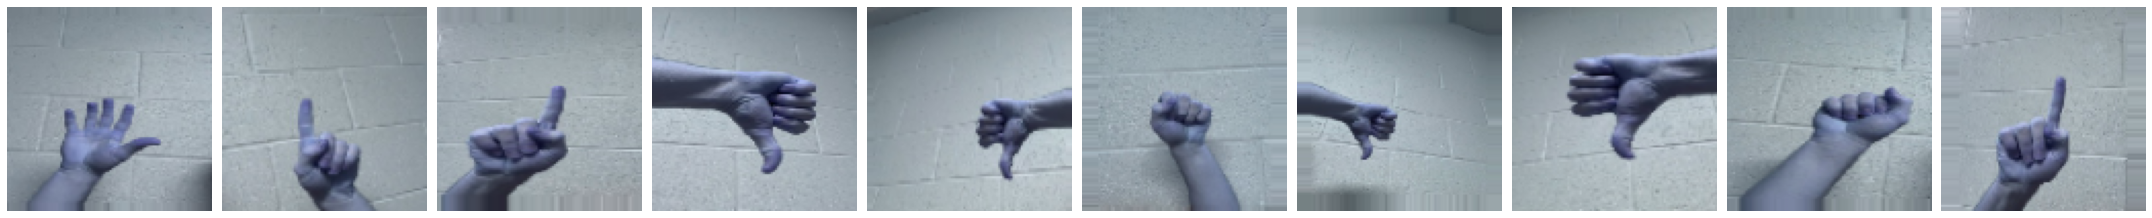

Actual labels
palm   up   up   down   down   fists   down   down   fists   up   fists   down   fists   up   fists   palm   

In [ ]:
word_dict = {0:'down',1:'fists',2:'palm',3:'up'}
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

In [ ]:
import numpy as np
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('saved_model/my_model')

background = None
accumulated_weight = 0.5

ROI_top = 100
ROI_bottom = 300
ROI_right = 150
ROI_left = 350

In [ ]:
#model = load_model('saved_model/my_model')


In [ ]:
#model = tf.keras.models.load_model('saved_model/my_model')


In [ ]:
#Function to calculate the background accumulated weighted average

def cal_accum_avg(frame, accumulated_weight):

    global background
    
    if background is None:
        background = frame.copy().astype("float")
        return None

    cv2.accumulateWeighted(frame, background, accumulated_weight)

In [ ]:
#Segmenting the hand, i.e, getting the max contours and the thresholded image of the hand detected.

def segment_hand(frame, threshold=25): 
    global background
    
    diff = cv2.absdiff(background.astype("uint8"), frame)

    
    _ , thresholded = cv2.threshold(diff, threshold, 255,cv2.THRESH_BINARY)
    
     #Fetching contours in the frame (These contours can be of hand
#or any other object in foreground) …

    image, contours, hierarchy =cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    # If length of contours list = 0, means we didn't get any
    #contours
    if len(contours) == 0:
        return None
    else:
        # The largest external contour should be the hand 
        hand_segment_max_cont = max(contours, key=cv2.contourArea)
        
        # Returning the hand segment(max contour) and the
  #thresholded image of hand...
        return (thresholded, hand_segment_max_cont)

In [ ]:
import cv2

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...


In [ ]:
cam = cv2.VideoCapture(0)
num_frames =0
if not cam.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cam.read()

    # flipping the frame to prevent inverted image of captured
    #frame...
    if not ret:
      print("Can't receive frame (stream end?). Exiting ...")
      break
    frame = cv2.flip(frame, 1)

    frame_copy = frame

    # ROI from the frame
    roi = frame[ROI_top:ROI_bottom, ROI_right:ROI_left]

    gray_frame = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)  
    gray_frame = cv2.GaussianBlur(gray_frame, (9, 9), 0)


    if num_frames < 70:
        
        cal_accum_avg(gray_frame, accumulated_weight)
        
        cv2.putText(frame_copy, "FETCHING BACKGROUND...PLEASE WAIT",
  (80, 400), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,0,255), 2)
    
    else: 
        # segmenting the hand region
        hand = segment_hand(gray_frame)
        
        # Checking if we are able to detect the hand...
        if hand is not None:
            
            thresholded, hand_segment = hand

            # Drawing contours around hand segment
            cv2.drawContours(frame_copy, [hand_segment + (ROI_right,
      ROI_top)], -1, (255, 0, 0),1)
            
            cv2.imshow("Thesholded Hand Image", thresholded)
            
            thresholded = cv2.resize(thresholded, (64, 64))
            thresholded = cv2.cvtColor(thresholded,
 cv2.COLOR_GRAY2RGB)
            thresholded = np.reshape(thresholded,
(1,thresholded.shape[0],thresholded.shape[1],3))
            
            pred = model.predict(thresholded)
            cv2.putText(frame_copy, word_dict[np.argmax(pred)],
(170, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
            
    # Draw ROI on frame_copy
    cv2.rectangle(frame_copy, (ROI_left, ROI_top), (ROI_right,
    ROI_bottom), (255,128,0), 3)

    # incrementing the number of frames for tracking
    num_frames += 1

    # Display the frame with segmented hand
    cv2.putText(frame_copy, "DataFlair hand sign recognition_ _ _",
    (10, 20), cv2.FONT_ITALIC, 0.5, (51,255,51), 1)
    cv2.imshow("Sign Detection", frame_copy)


    # Close windows with Esc
    k = cv2.waitKey(1) & 0xFF

    if k == 27:
        break

# Release the camera and destroy all the windows
cam.release()
cv2.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...
